# Problem Set 1, due FRIDAY, APRIL 17, 2020 @ 11:59pm

This problem set covers linear regression and regularization.

*Please*:
1. Complete the information below with your name, e-mail address, and student ID number
2. Complete the assignment carefully, working through all parts (question 1, question 2, question 3a, and question 3b)
3. Before submitting, select "Restart Kernel and Run All Cells..." from the "Kernel" menu, to make sure this notebook runs cleanly.
4. Submit using the "submitps" command

<b>Your information</b>:<br>
Name:  Zhizhi Wang<br>
e-mail address: zwang426@ucr.edu<br>
SID #: 862188792<br>

By submitting this notebook, you are asserting that the work presented is your own, was completed without external aid, and was completed for this offering of this course.

In [2]:
# Preliminaries: do not change
# DO NOT ADD any additional imports!
# DO NOT EDIT THIS CELL
import numpy as np # for numpy
import matplotlib.pyplot as plt # for plotting
plt.rcParams['figure.figsize'] = [10,10] # to make plots bigger   

## Question 1 (4 points)

***
Find an analytic expression for the bias and variance of ridge regression.  To make this problem simpler, assume that the emperical covariance of $x$ is the identity matrix (no matter how the data are drawn): $\frac{1}{m}X^\top X = I$.  Otherwise, make the only same assumptions as in class for the bias and variance of LLS.

While this might seem like a strange assumption, it amounts to the situation in which the features are uncorrelated (and have zero mean), which is often achieved emperically by "whitening" the data (a method we'll discuss later).  But, more importantly, it removes the need to reason about the expectation of $(X^\top X)^{-1}$, which is quite annoying, while still gaining insight.

#### Solutions
Assume $y = x^{T} w^{*} + \eta $ (where $w^{*}$ is the true parameters and $\eta$ is the noise with mean 0 and variance $\sigma ^ {2}$)

for ridge regression:

$L = \sum_{i=1}^{m}(y_i - w^T x_i)^{2} + \lambda w^{T}w$

$w_{ridge} = arg \underset{w}{min} L$

it means that $2 * X^{T}(Xw_{ridge} - Y) + 2 * \lambda w_{ridge} = 0$

$(X^T X + \lambda I)w_{ridge} = X^T Y$

According to the assumption: $X^T X = m I$

$(m + \lambda)Iw_{ridge} = X^T Y$

$w_{ridge} = \frac{X^T Y}{m+\lambda}$

$E(w_{ridge}) = E(\frac{X^T Y}{m+\lambda})$

$E(w_{ridge}) = E_X[E_{Y|X}(\frac{X^T Y}{m+\lambda})]$

$E(w_{ridge}) = \frac{1}{m + \lambda}E_X[X^T E_{Y|X}(Y)]$

$E(w_{ridge}) = \frac{1}{m + \lambda}E_X[X^T X w^{*}]$

$E(w_{ridge}) = \frac{m}{m + \lambda} w^{*} $

So the bias is $w^{*} - \frac{m}{m + \lambda} w^{*} = \frac{\lambda}{m + \lambda} w^{*} $

$Variance = E[(w_{ridge} -\frac{m}{m + \lambda} w^*)(w_{ridge} - \frac{m}{m + \lambda} w^*)] $

$\qquad \quad \; \;  = E(w_{ridge} w_{ridge}^{T}) - E(\frac{m}{m + \lambda}w^*w_{ridge}^T) - E(\frac{m}{m + \lambda}w_{ridge}w^{*T})) + E(\frac{(m) ^ 2}{(m + \lambda)^2}w^*w^{*T}) $

$\qquad \quad \; \;  = E(w_{ridge} w_{ridge}^{T}) - \frac{(m)^2}{(m + \lambda) ^ 2}w^* w^{*T}$

$\qquad \quad \; \;  = \frac{1}{(m + \lambda)^2}E(X^T Y Y^T X) - \frac{(m)^2}{(m + \lambda) ^ 2}w^* w^{*T}$

$E(Y Y^T) = E[(Xw^* + \eta)(Xw^* + \eta)]$

$\qquad \quad \; \;  = Xw^*w^{*T}X^T + I \sigma^2$

So,

$Variance = \frac{1}{(m + \lambda)^2}E(X^T(Xw^*w^{*T}X^T + I\sigma^2)X) - \frac{m^2}{(m + \lambda) ^ 2}w^* w^{*T}$

$\qquad \quad \; \;  = \frac{1}{(m + \lambda)^2}(E(X^TXw^*w^{*T}X^TX) +\sigma^2E(X^TX)) - \frac{(m)^2}{(m + \lambda) ^ 2}w^* w^{*T}$

$\qquad \quad \; \;  = \frac{1}{(m + \lambda)^2}(m^2w^*w^{*T} + m\sigma^2E(I)) - \frac{(m)^2}{(m + \lambda) ^ 2}w^* w^{*T}$

$\qquad \quad \; \;  = \frac{m \sigma^2}{(m + \lambda)^2}E(I)$

## Question 2 (4 points)

***
In this question, you will reproduce the bias-variance plots from the slide set 04 on slide #12.  But, for a different target function.

Let the true function be $f(x) = \tan(\frac{\pi x}{3}) + (x - 0.5)^2$.
Draw your $x$ points uniformly at random from the interval $(-1,+1)$.
Let the target $y$ values be $f(x) + \text{noise}$ where the noise is drawn from a normal (Gaussian) distribution with mean $0$ and *standard deviation* 0.5.

$x$ is one-dimensional in this toy example.  However, you should fit a *fifth*-degree polynomial, making the effective number of features $6$.

You are to make three graphs, one for each of the three different values of $\lambda$ in ridge regression: 0.001, 0.1, 10.  For each graphs, plot 100 samples of the resulting learned function (each trained from 10 random points) in <font color=green>green</font>.  Plot the average function (across 1000 samples) in <font color="blue">blue</font>.  Plot the true function in <b>black</b>.

Set the axes to be consistent across the graphs:  $x$ ranging from $-1$ to $+1$, and $y$ ranging from $-0.5$ to $+4.5$.

<b>As a note</b>: for ridge regression, we generally do *not* penalize the weight corresponding to the intercept/constant term.  The derivation on the slides ignores this point, but you should not for this assignment.  That is, the regularization term used in class is $w^\top w = w^\top Iw$.  However, if the first component of $w$ corresponds to this constant term, then the regularization term should be $w^\top \tilde{I} w$, where $\tilde{I}$ is just like the identity matrix, but the upper-left-most element is $0$ instead of $1$: 
\begin{align*}
\tilde{I} &= \begin{bmatrix} 0 & 0 & 0 &  & 0 \\
                             0 & 1 & 0 &  \cdots & 0 \\
                             0 & 0 & 1 &        & 0 \\
                              & \vdots &  & \ddots & \vdots \\
                             0 & 0 & 0 & \cdots & 1 \end{bmatrix}\,\,.
\end{align*}

Text(0.5, 1.0, 'plot 3 with lambda = 10')

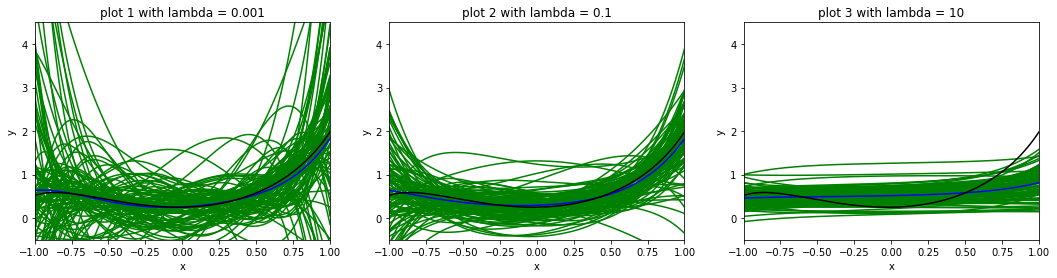

In [34]:
# Your code (solutions) here
# a few notes:
# np.pi is the constant pi
# np.tan is the trig function tangent
# np.random.randn(m,n) will return an m-by-n matrix of values all independently drawn from a zero-mean unit-standard deviation normal distribution
# to compute A^{-1}*b (if A is a matrix and b is a vector), use np.linalg.solve(A,b)
# remember that in numpy, x*y is element-wise multiplication.  x@y is vector multiplication
# A.T is the transpose of A
# 
# the sample code below (which you should certainly replace) generates three subplots (and puts trivial plots in each)
# it isn't example of good programming (look at all the duplicated code!), but just an illustration of how to generate multiple plots

#true function
def f_x(x):
    return np.tan(x*np.pi/3) + (x-0.5)**2

#get the polynomia
def ploy_x(x,d = 5):
    x_arr = [i for i in range(d+1)]
    ret = np.power(x, x_arr)
    return ret


#get the w_ridge matrix through the formula w = (X^T*X + lambda * I^{~})^{-1} * X^T * Y
def get_w_ridge(X, Y, lam):
    I = np.eye(X.shape[1])
    I[0,0] = 0
    vec = X.T @ Y
    mat = np.dot(X.T,X) + lam * I
    return np.linalg.solve(mat, vec)

#noise: normal distribution with mean = 0, deviation = 0.5
noise = np.random.normal(size = 1000, loc = 0.0, scale = 0.5)
x_range = np.linspace(-1,1,1000)
x_index = np.random.permutation(1000)
y_range = f_x(x_range) 
#use y_train for training
y_train = y_range + noise

X_all = []
#create matrix X_all to store all features line by line
for i in range(1000):
    poly_x = ploy_x(x_range[i], 5)
    X_all.append(list(poly_x))

X_all = np.mat(X_all)

fig = plt.figure(figsize=(18,4))

ax = fig.add_subplot(1,3,1)
w_avg = np.zeros((6,1))
for i in range(0, 1000, 10):
    idx = x_index[i:i+10]
    X = []
    Y = []
    for index in idx:
        poly_x = ploy_x(x_range[index], 5)
        X.append(list(poly_x))
        Y.append(list(y_train)[index])
        
    X = np.mat(X)
    Y = np.array(Y).reshape((-1,1))
    w_ridge = get_w_ridge(X, Y, 0.001)
    w_avg += w_ridge
    
    ax.plot(x_range, X_all @ w_ridge, color = 'green')

w_avg = w_avg * 0.01
ax.plot(x_range, X_all @ w_avg, color = 'blue')
ax.plot(x_range, y_range, color = 'black')
ax.axis([-1,1,-0.5,4.5])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('plot 1 with lambda = 0.001')

ax = fig.add_subplot(1,3,2)
w_avg = np.zeros((6,1))
for i in range(0, 1000, 10):
    idx = x_index[i:i+10]
    X = []
    Y = []
    for index in idx:
        poly_x = ploy_x(x_range[index], 5)
        X.append(list(poly_x))
        Y.append(list(y_train)[index])
        
    X = np.mat(X)
    Y = np.array(Y).reshape((-1,1))
    w_ridge = get_w_ridge(X, Y, 0.1)
    w_avg += w_ridge
    
    ax.plot(x_range, X_all @ w_ridge, color = 'green')

w_avg = w_avg * 0.01
ax.plot(x_range, X_all @ w_avg, color = 'blue')
ax.plot(x_range, y_range, color = 'black')
ax.axis([-1,1,-0.5,4.5])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('plot 2 with lambda = 0.1')

ax = fig.add_subplot(1,3,3)
w_avg = np.zeros((6,1))
for i in range(0, 1000, 10):
    idx = x_index[i:i+10]
    X = []
    Y = []
    for index in idx:
        poly_x = ploy_x(x_range[index], 5)
        X.append(list(poly_x))
        Y.append(list(y_train)[index])
        
    X = np.mat(X)
    Y = np.array(Y).reshape((-1,1))
    w_ridge = get_w_ridge(X, Y, 10)
    w_avg += w_ridge
    
    ax.plot(x_range, X_all @ w_ridge, color = 'green')

w_avg = w_avg * 0.01
ax.plot(x_range, X_all @ w_avg, color = 'blue')
ax.plot(x_range, y_range, color = 'black')
ax.axis([-1,1,-0.5,4.5])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('plot 3 with lambda = 10')

## Question 3 (7 points)

***

In this question you will compare ridge regression, lasso regression, and forward-stepwise selection (see section 3.3.2 in the textbook).  Forward-stepwise (*not* stagewise!) selection approximates best-subset.  If asked to use only $k$ of the $n$ features, it doesn't try all $n \choose k$ possibilities (computationally infeasible).  Instead, it assumes that the $k$ best features will be the same as the $k-1$ best features, except with one additional feature added.  So, it only has to try the $n-k+1$ features not selected by forward-stepwise selection with $k-1$ features.  

But, first some preliminaries:

The code block below (which you should not change) loads in a community dataset.  The supplied file, `comm.txt`, contains the data for the "Communities and Crime" data set from the UCI Machine Learning repository.  This problem has 1994 examples, each with 100 attributes.  This is small by modern machine learning standards, but will provide a simple example for this question.  Each attribute represents some quantity about a US community in the 1990s.  The last attribute represents the rate of violent crimes in the same community (per captia).  As loaded, all of the attributes have been "normalized."  That is, they have been scaled to fit on the same range.  In some cases this is a good idea; in others it is not.  It has already been performed here, so we do not have a choice.  We modify this slightly to "z-normalize" the data (a different normalization).  We'll discuss both later in the class.

The goal is the predict the violent crime rate from the other attributes.  We would like to know how well our method would work on "future unseen" communities.  However, we don't know what those future communities would be.  So, instead we will reserve part of the data as *testing data*.  The dataset has already been placed in random order.  Use the first 1000 communities as the *training data*.  Use the last 994 as the *testing data*.

Finally, we add a column of all 1s as the first (or zeroth) column of the training and testing data.  We'll be trying linear regressors and the weight associated with this first (or zeroth) feature will be the "constant term."

In [28]:
### DO NOT EDIT THIS CELL
D = np.loadtxt('comm.txt') # load data
X = D[:,0:99] # split first 99 columns into X
Y = D[:,-1] # and last column into Y

trainX = X[0:1000,:] # split first 1000 (indexed 0 through 999) into training
trainY = Y[0:1000]
testX = X[1000:,:] # and last 999 (indexed 1000 to the end) into testing
testY = Y[1000:]

# z-normalize the features (so they are roughly on the same scale)
trainstd = np.std(trainX,0)
trainmu = np.mean(trainX,0)
trainX = (trainX-trainmu)/trainstd
testX = (testX-trainmu)/trainstd

# augment with column of ones
trainX = np.hstack((np.ones((trainX.shape[0],1)),trainX))
testX = np.hstack((np.ones((testX.shape[0],1)),testX))

### part a (5 points)

Write code below to plot (in a single plot) the training and testing error of each of the three methods, as we vary the regularization strength ($\lambda$ in the case of ridge and lasso regression, $k$ -- the number of features -- in the case of forward-stepwise selection).  You'll need to select a good range of values for each method to smoothly draw out a curve for each.

The vertical axis should be the error (either training or testing): the *average* squared error in prediction.  The horizontal axis needs to be the same for all methods, so using $\lambda$ or $k$ would not make sense.  Rather, plot the error versus the sum of the absolute values of the weights (ignoring the "constant" weight), normalized by same value for LLS estimate.  That is, the horizontal axis should vary from $0$ (or so) to $1$, corresponding to the length (in L1 distance) the generated weight vector is, as a fraction of the length of the full LLS estimate.

Plot the data on a semi-log plot (with the horizontal axis on a log scale and the vertical axis on a linear scale:  use `plt.semilogx`).  Set the limits of the plot with the following bit of code (as a hint, this should highlight the interesting part of the plot).

```
plt.ylim(bottom=0.015,top=0.035)
plt.xlim(left=0.01,right=1.0)
```

To make grading easier, plot the training error in solid lines and the testing error in dashed lines.  Plot ridge regression in <font color="red">red</font>, lasso regression in <font color="blue">blue</font>, and forward-stepwise selection in <font color="green">green</font>.  You will have six lines in total.  Label them in a legend.

A good stable algorithm for the lasso solution is tricky.  Use the provided function below (`lasso`), which uses ScikitLearn.  You may not use sklearn for any of your code, however.

99
99


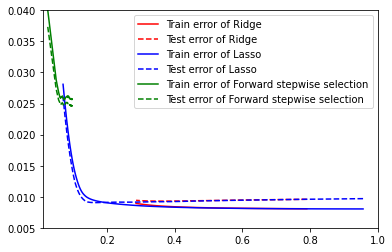

In [31]:
# use this function to do lasso regression
# X is m-by-n, Y is of size m (vector), lam is a scalar (lambda)
# returns a vector of size n
def lasso(X,Y,lam):
    from sklearn.linear_model import Lasso
    
    lm = Lasso(alpha=lam,max_iter=10000)
    lm.fit(X[:,1:],Y)
    w = np.zeros((X.shape[1],))
    w[1:] = lm.coef_
    w[0] = lm.intercept_
    return w
    
## your solutions (code) here
#ridge regression
def ridge(X, Y, lam):
    I = np.eye(X.shape[1])
    vec = X.T @ Y
    mat = np.dot(X.T,X) + lam * I
    return np.linalg.solve(mat, vec)

def get_w_LLS(X, Y):
    vec = X.T @ Y
    mat = np.dot(X.T,X)
    return np.linalg.solve(mat, vec)

#this was used to generate w and then use it to calculate loss 
def get_w_linear(X, Y):
    vec = X.T @ Y
    mat = X.T @ X
    return vec / mat
#forward stepwise selection
#k is the number of features that we want
def forward_stepwise_select(X, Y, k = 10):
    f_index = [i for i in range(X.shape[1])]
    select_index = []
    w_select = []
    while(k > 0):
        min = 10000000
        loss_index = X.shape[1] + 1
        for index in f_index:
            w = get_w_linear(X[:,index], Y)
            y = Y - np.dot(w, X[:,index])
            loss = np.sum(y**2)
            if loss < min:
                min = loss
                loss_index = index
                w_para = w
                min_y = y
            
        if loss_index == X.shape[1] + 1:
            break
        
        select_index.append(loss_index)
        w_select.append(w)
        f_index.remove(loss_index)
        Y = min_y
        k = k-1
        
    return w_select, select_index

"""
these list are used to store x_points of ridge, lasso forward stepwise selection
y_points of train error of ridge, lasso forward stepwise selection
y_points of test error of ridge, lasso forward stepwise selection
"""
X_ridge = []
X_lasso = []
X_stepwise = []
Y_ridge_train = []
Y_lasso_train = []
Y_stepwise_train = []
Y_ridge_test = []
Y_lasso_test = []
Y_stepwise_test = []



w_lls = get_w_LLS(trainX, trainY)
w_weight = np.sum(np.abs(w_lls))


for lam in range(1,101,1):
    w_ridge = ridge(trainX, trainY, lam)
    precY_train =np.dot(trainX, w_ridge)
    weight_total = np.sum(np.abs(w_ridge))
    lossY_train = np.sum((precY_train - trainY)**2) / (2 * trainX.shape[0]) 
    X_ridge.append(weight_total/w_weight)
    Y_ridge_train.append(lossY_train)
    precY_test = np.dot(testX, w_ridge)
    lossY_test = np.sum((precY_test - testY)**2) / (2 * trainX.shape[0])
    Y_ridge_test.append(lossY_test)

for lam in np.logspace(-5,0,100):
    w_lasso = lasso(trainX, trainY, lam)
    precY_train =np.dot(trainX, w_lasso)
    weight_total = np.sum(np.abs(w_lasso))
    lossY_train = np.sum((precY_train - trainY)**2) / (2 * trainX.shape[0])
    X_lasso.append(weight_total/w_weight)
    Y_lasso_train.append(lossY_train)
    precY_test = np.dot(testX, w_lasso)
    lossY_test = np.sum((precY_test - testY)**2) / (2 * trainX.shape[0])
    Y_lasso_test.append(lossY_test)


w, index = forward_stepwise_select(trainX, trainY, k = 99)
print(len(index))
print(len(w))
train_X = trainX[:,index[0]].reshape((-1,1))
test_X = testX[:,index[0]].reshape((-1,1))
trainY = trainY.reshape((-1, 1))
testY = testY.reshape((-1,1))

for k in range(99):
    w_stepwise = np.array(w[:k+1]).reshape((-1,1))
    if (k!=0):
        train_X = np.hstack((train_X, trainX[:,index[k]].reshape((-1,1))))
        test_X = np.hstack((test_X, testX[:,index[k]].reshape((-1,1))))
    precY_train = np.dot(train_X, w_stepwise)
    weight_total = np.sum(np.abs(w_stepwise))
    lossY_train = np.sum((precY_train - trainY)**2) / (2 * trainX.shape[0])
    X_stepwise.append(weight_total/w_weight)
    Y_stepwise_train.append(lossY_train)
    precY_test = np.dot(test_X, w_stepwise)
    lossY_test = np.sum((precY_test - testY)**2) / (2 * trainX.shape[0])
    Y_stepwise_test.append(lossY_test)
    


plt.ylim(bottom=0.005,top=0.040)
plt.xlim(left=0.01,right=1.0)

plt.plot(X_ridge, Y_ridge_train, color = 'red', linestyle = "solid", label = "Train error of Ridge")
plt.plot(X_ridge, Y_ridge_test, color = 'red', linestyle = "dashed", label = "Test error of Ridge")
plt.plot(X_lasso, Y_lasso_train, color = 'blue', linestyle = "solid", label = "Train error of Lasso")
plt.plot(X_lasso, Y_lasso_test, color = 'blue', linestyle = "dashed", label = "Test error of Lasso")
plt.plot(X_stepwise, Y_stepwise_train, color = 'green', linestyle = "solid", label = "Train error of Forward stepwise selection")
plt.plot(X_stepwise, Y_stepwise_test, color = 'green', linestyle = "dashed", label = "Test error of Forward stepwise selection")

plt.legend()
plt.show()


### part b (2 points)

Generate 3 plots below, stacked one on top of the other, showing the weights (each weight element its own separate line) as a function of the normalized weight vector length (that is, same horizontal axis as part a).  Use a standard linear plot, not a semi-log plot this time.

You'll have 100 lines per plot, so this could get a little messy.  The provided framework below sets the colors to something reasonable, sets up three plots, and uses "alpha=0.5" so that overlapping lines can be somewhat seen.

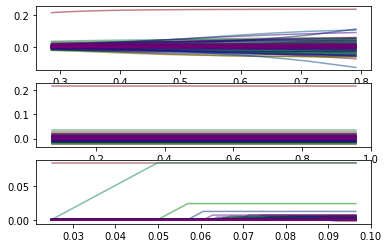

In [30]:
# just to get nice colors:
cm = plt.get_cmap('gist_rainbow')
cc = [tuple(x/2 for x in cm(1.*i/100.0)) for i in range(100)]

%matplotlib inline

w_lls = get_w_LLS(trainX, trainY)
w_weight = np.sum(np.abs(w_lls))
X = []
W = []
#ridge
for lam in range(1,101,1):
    w_ridge = ridge(trainX, trainY, lam)
    X.append(np.sum(np.abs(w_ridge)) / w_weight)
    w = w_ridge.reshape((1,-1)).tolist()
    W.append(w[0])
    
    
W = np.mat(W).T.tolist()
ax = plt.subplot(3,1,1)
ax.set_prop_cycle(color=cc)
for w in W:
    ax.plot(X, w, alpha=0.5)

X = []
W = []
#lasso
for lam in np.logspace(-5,0,100):
    w_lasso = lasso(trainX, trainY, lam)
    X.append(np.sum(np.abs(w_lasso)) / w_weight)
    w = w_ridge.reshape((1,-1)).tolist()
    W.append(w[0])
    
W = np.mat(W).T.tolist()    
ax = plt.subplot(3,1,2)
ax.set_prop_cycle(color=cc)
for w in W:
    ax.plot(X, w, alpha = 0.5)

#stepwise
X = []
W = []
w_stepwise, index = forward_stepwise_select(trainX, trainY, k = 100)
w_temp = [0 for i in range(100)]
for i in range(100):
    w_temp[index[i]] = w_stepwise[i]
    W.append(list.copy(w_temp))
    X.append(np.sum(np.abs(w_temp)) / w_weight)
    
W = np.mat(W).T.tolist()  
ax = plt.subplot(3,1,3)
ax.set_prop_cycle(color=cc)
# third plot:
for w in W:
    ax.plot(X, w, alpha=0.5)
